2154496/2144903 [==============================] - 1s 0us/step
[[  443     0     0     0     0     0     0     0     0     0     5     0
      0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     1     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     7     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     2     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   242     0     0     0     5     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

                  precision    recall  f1-score   support

           back.       1.00      0.99      0.99       448
buffer_overflow.       0.71      0.83      0.77         6
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      0.88      0.93         8
           imap.       1.00      1.00      1.00         2
        ipsweep.       0.98      0.97      0.98       249
           land.       1.00      1.00      1.00         6
       multihop.       0.00      0.00      0.00         2
        neptune.       1.00      1.00      1.00     21354
           nmap.       0.84      0.97      0.90        37
         normal.       1.00      1.00      1.00     19618
           perl.       0.00      0.00      0.00         0
            phf.       1.00      1.00      1.00         1
            pod.       1.00      0.95      0.97        58
      portsweep.       0.99      1.00      1.00       215
          satan.       1.00      0.98      0.99       327
          smu

Text(0, 0.5, 'Mean Error')

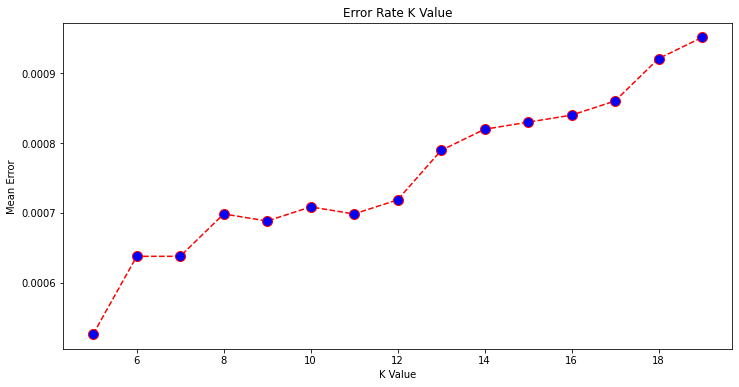

In [1]:
# dataset is taken from "https://datahub.io/machine-learning/kddcup99#resource-kddcup99_zip"

# knn clasification using k values from 1 to 40 to see which k value is good

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import get_file

#csv to dataframe conversion 
path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
df = pd.read_csv(path, header=None)

df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

fin = []

for i in range(1,4):
    v = set(df.iloc[:,i].values)
    fin += v     
    
d = dict(enumerate(fin, start=1))
mymap = dict((v,k) for k,v in d.items())

#making string to numbers
dataset = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

#selecting the columns excluding lables
X = dataset.iloc[:, :-1].values

#selecting the lables column 
y = dataset.iloc[:, -1].values

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#scaling by doing normalisation
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Training and Predictions using library 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#testing 
y_pred = classifier.predict(X_test)

#elavuating the results 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#now k values variations
error = []

# Calculating error for K values between 1 and 40
for i in range(5, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
#ploting 
plt.figure(figsize=(12, 6))
plt.plot(range(5, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [2]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print ("Accuracy is {}.".format(round(acc,4)))

Accuracy is 0.9995.


In [8]:
array = confusion_matrix(y_pred, y_test)
print(array)

[[  443     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     5     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     7     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     2     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     1     0     0   242     0     0     0     0     4     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]


Text(151.5, 0.5, 'Truth')

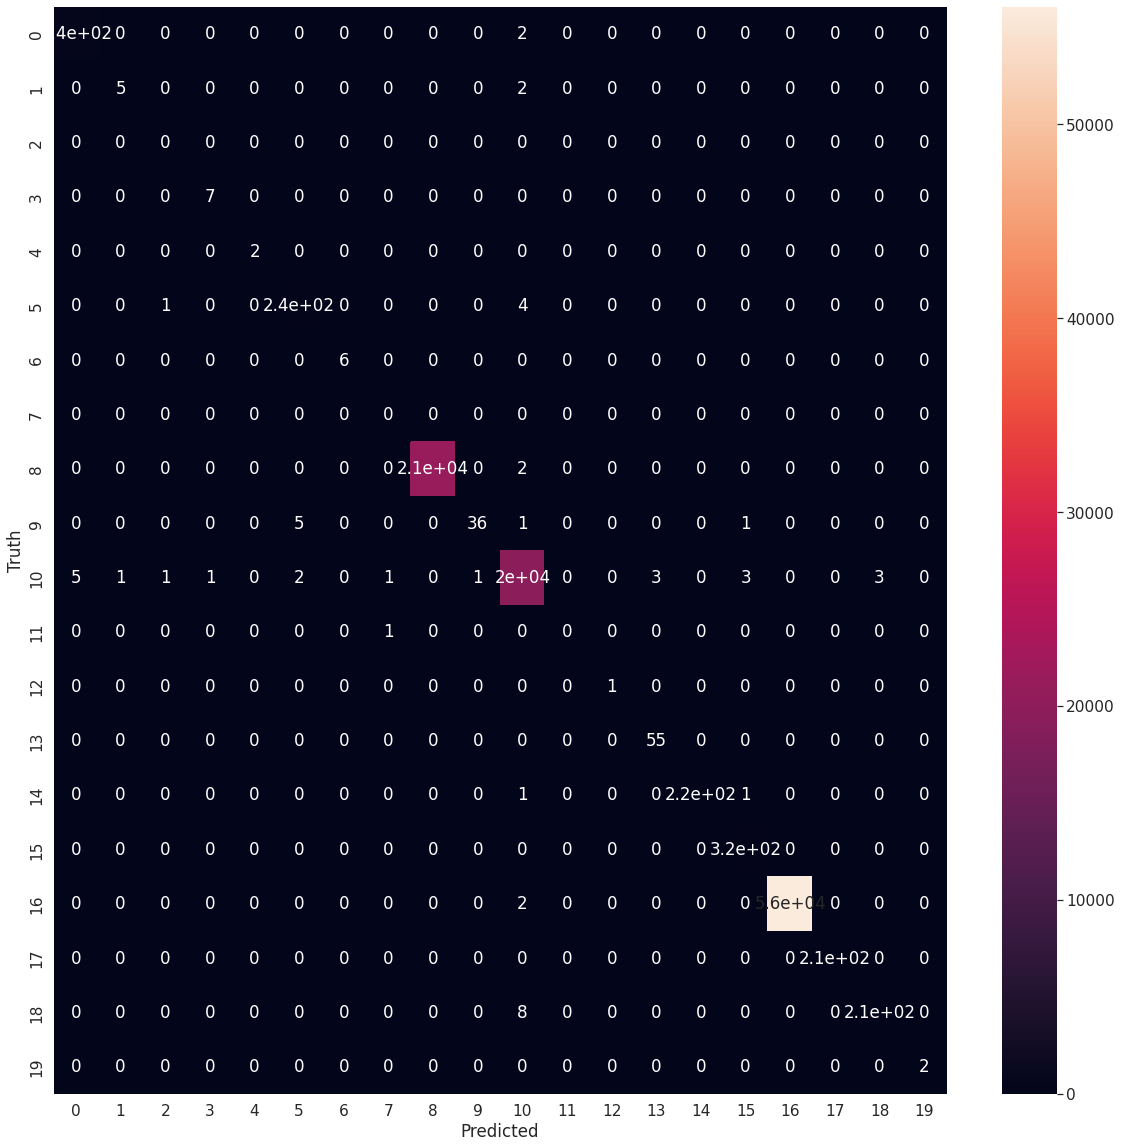

In [16]:
import seaborn as sn

plt.figure(figsize=(20,20))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [7]:
print(classification_report(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

                  precision    recall  f1-score   support

           back.       0.99      1.00      0.99       445
buffer_overflow.       0.83      0.71      0.77         7
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       0.88      1.00      0.93         7
           imap.       1.00      1.00      1.00         2
        ipsweep.       0.97      0.98      0.98       247
           land.       1.00      1.00      1.00         6
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     21356
           nmap.       0.97      0.84      0.90        43
         normal.       1.00      1.00      1.00     19617
           perl.       0.00      0.00      0.00         1
            phf.       1.00      1.00      1.00         1
            pod.       0.95      1.00      0.97        55
      portsweep.       1.00      0.99      1.00       217
          satan.       0.98      1.00      0.99       322
          smu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics

#now k values variations
accuracy = []

# Calculating accuracy for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
    

In [21]:
print(accuracy)
print(error)

[0.9996457669146298, 0.9995344365163706, 0.9995850412428521, 0.9995141946257781, 0.9994737108445929]
[0.000526289155407115, 0.0006376195536663124, 0.0006376195536663124, 0.0006983452254440565, 0.0006882242801477659, 0.0007084661707403471, 0.0006983452254440565, 0.0007185871160366378, 0.0007894337331106725, 0.0008197965689995446, 0.0008299175142958352, 0.000840038459592126, 0.0008602803501847072, 0.0009210060219624513, 0.0009513688578513234]


In [ ]:
'''
#ploting 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 8), accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate at K Value')
plt.xlabel('K Value')
plt.ylabel('Acc %')
'''


In [28]:
import numpy as np
#import to mount google drive location
from google.colab import drive
drive.mount("/content/drive")

errorLogPath = "/content/drive/My Drive/Colab Notebooks/KNN Logs/error_log.csv"
np.savetxt(errorLogPath, error, delimiter=',')

accLogPath = "/content/drive/My Drive/Colab Notebooks/KNN Logs/acc_log.csv"
np.savetxt(accLogPath, accuracy, delimiter=',')

#print(error)
#print(accuracy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
